# Employment analysis

This is an analysis of employment in Brooklyn and NYC. Unfortunately, employment data could only be located at the county level but not at the neighborhood level (data was pulled from: https://www.bls.gov/cew/datatoc.htm).

I also did a quick analysis of the other geographic labor data available through QCEW ("CSVs By Area"). These data sets contained much more detailed information than seemed necessary at this time. If we wanted to pull more detailed data, we could do so.

In [1]:
# Libraries
import urllib.request
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
import itertools

## Pulling data

In [2]:
# To get county data for 2010 to 2017
# for i in range(0,8):
#     url = 'https://data.bls.gov/cew/data/files/201{}/xls/201{}_all_county_high_level.zip'.format(i, i)
#     zip_file = 'all_county_high_level_201{}.zip'.format(i)
#     urllib.request.urlretrieve(url, zip_file)
#     !unzip $zip_file -d data/primary_source_data/qcew
#     for j in range(1, 5):
#         del_file = 'data/primary_source_data/qcew/allhlcn1{}{}.xlsx'.format(i, j)
#         !rm -r $del_file
#     !rm -r $zip_file

In [3]:
# # Since the data for 2018 is slightly different, manually pull it
# url_18 = 'https://data.bls.gov/cew/data/files/2018/xls/2018_all_county_high_level.zip'
# zip_file_18 = 'all_county_high_level_2018.zip'
# urllib.request.urlretrieve(url_18, zip_file_18)
# !unzip $zip_file_18 -d data/primary_source_data/qcew

## All county data over time

### Note: 

Uncomment the following cell to reload the data. Otherwise just use the data that was previously exported.

In [12]:
# # Get the dfs for each year
# county_dfs = []
# for i in range(0,8):
#     temp_df = pd.read_excel('data/primary_source_data/qcew/allhlcn1{}.xlsx'.format(i))
#     county_dfs.append(temp_df)

# # Combine the data
# counties = pd.concat(county_dfs)

# # Filter down to NYC counties
# counties = counties[counties.St=='36']
# counties = counties[(counties.Cnty == 5) | (counties.Cnty == 47) | (counties.Cnty == 61) | \
#                     (counties.Cnty == 81) | (counties.Cnty == 85)]

# # Remove integers from the "Industry" for easier plotting
# counties.Industry = counties.Industry.str.replace('\d+', '').str.lstrip()
# counties.head()

,Area Code,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
32756,36005,36,5.0,0,10,2010,A,County,New York,"Bronx County, New York",Total Covered,"Total, all industries",NaN,16613,232682,10406183101,860,44723,1.00,1.00
32757,36005,36,5.0,1,10,2010,A,County,New York,"Bronx County, New York",Federal Government,"Total, all industries",NaN,73,7833,581749039,1428,74267,1.44,1.62
32758,36005,36,5.0,2,10,2010,A,County,New York,"Bronx County, New York",State Government,"Total, all industries",NaN,10,2221,146187497,1266,65811,0.26,0.37
32759,36005,36,5.0,3,10,2010,A,County,New York,"Bronx County, New York",Local Government,"Total, all industries",NaN,12,12947,746346574,1109,57648,0.51,0.70
32760,36005,36,5.0,5,10,2010,A,County,New York,"Bronx County, New York",Private,"Total, all industries",NaN,16517,209681,8931899991,819,42598,1.08,1.04


In [11]:
# Uncomment to export the data again
# counties.to_csv('data/created_data/employment.csv', index=False)

In [13]:
# Load the data from the file that was previously exported
counties = pd.read_csv('data/created_data/employment.csv')
counties.head()

,Area Code,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,36005,36,5.0,0,10,2010,A,County,New York,"Bronx County, New York",Total Covered,"Total, all industries",NaN,16613,232682,10406183101,860,44723,1.00,1.00
1,36005,36,5.0,1,10,2010,A,County,New York,"Bronx County, New York",Federal Government,"Total, all industries",NaN,73,7833,581749039,1428,74267,1.44,1.62
2,36005,36,5.0,2,10,2010,A,County,New York,"Bronx County, New York",State Government,"Total, all industries",NaN,10,2221,146187497,1266,65811,0.26,0.37
3,36005,36,5.0,3,10,2010,A,County,New York,"Bronx County, New York",Local Government,"Total, all industries",NaN,12,12947,746346574,1109,57648,0.51,0.70
4,36005,36,5.0,5,10,2010,A,County,New York,"Bronx County, New York",Private,"Total, all industries",NaN,16517,209681,8931899991,819,42598,1.08,1.04


## Plotting

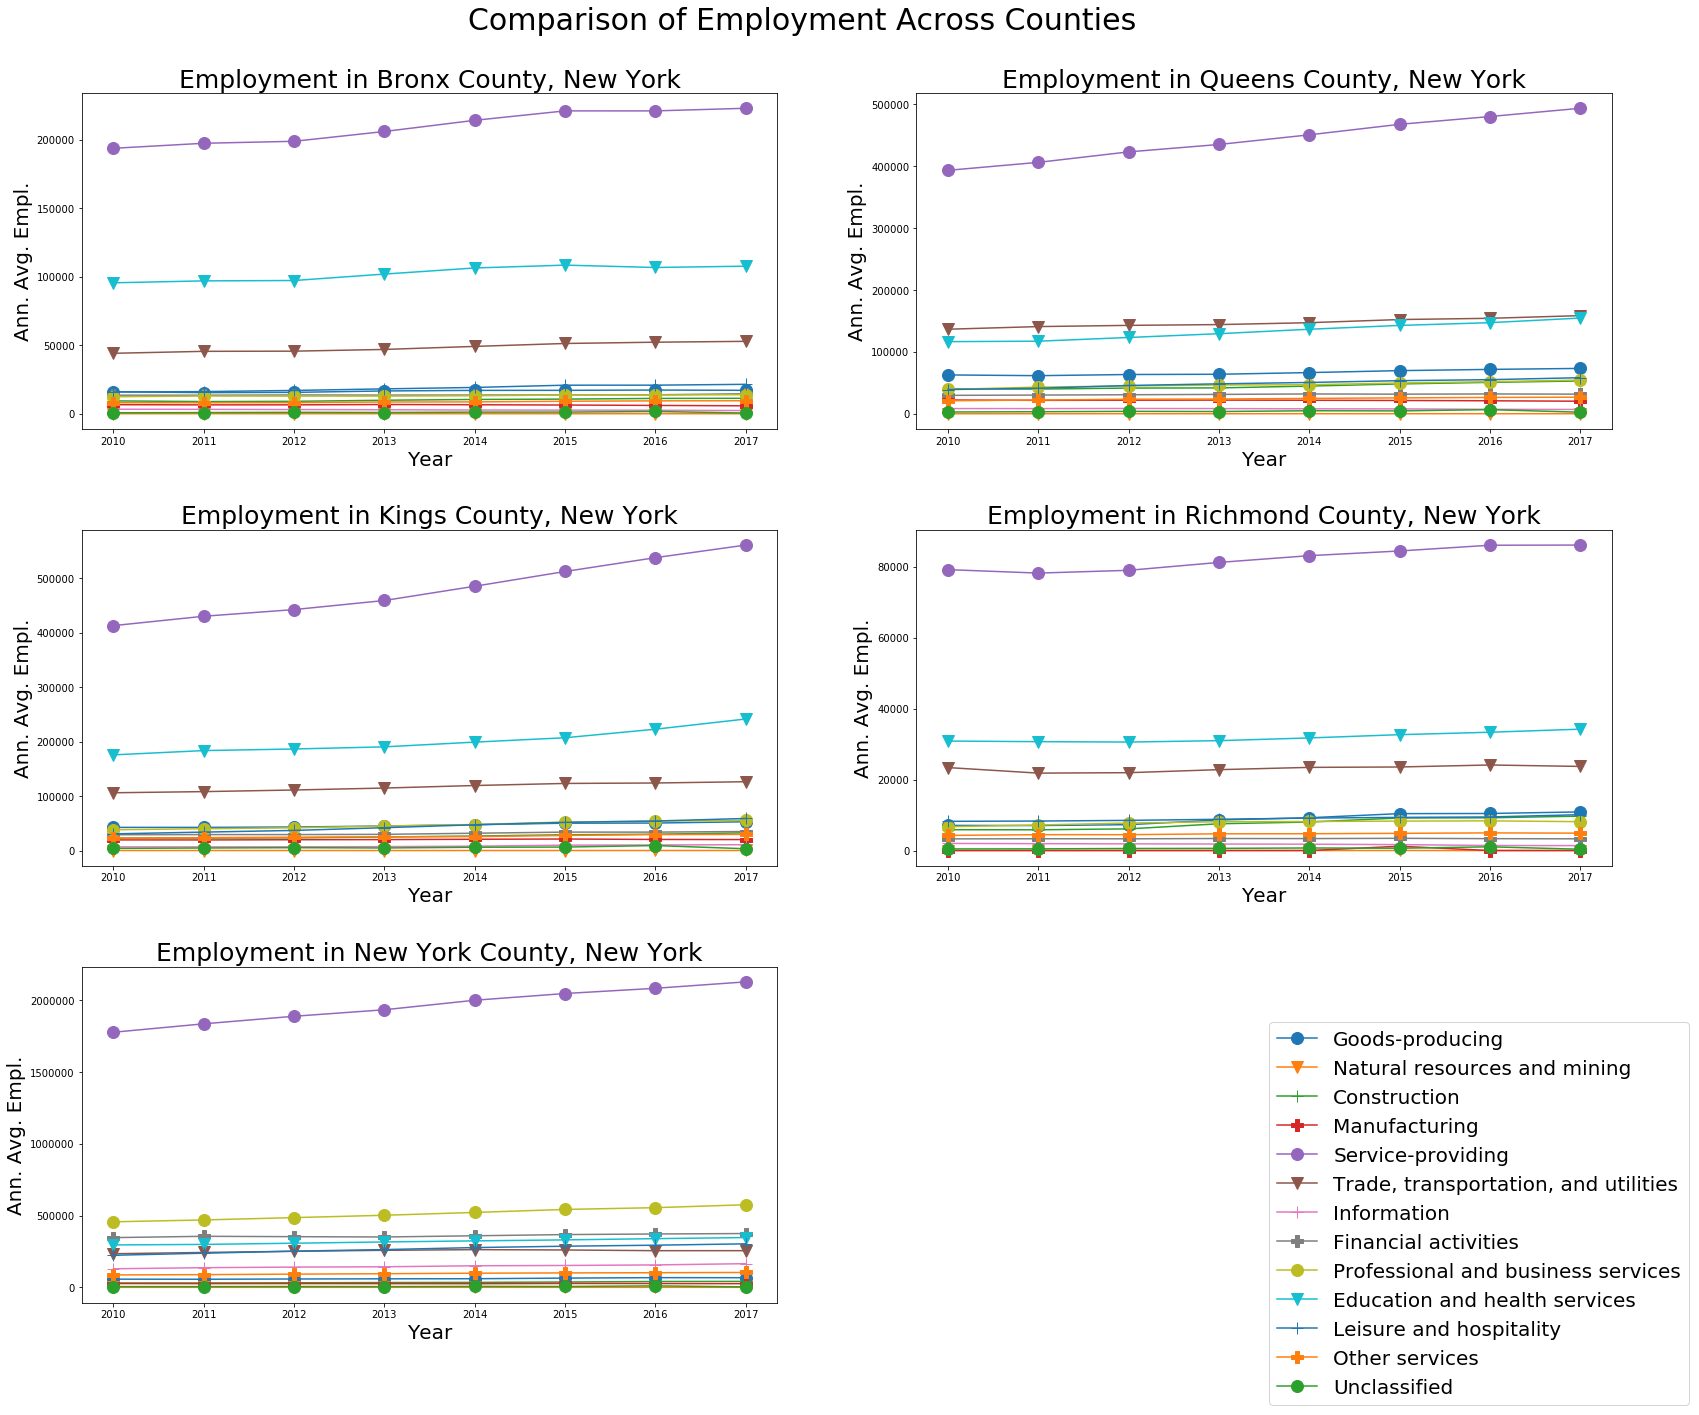

In [25]:
# To control font sizes
titles = 25
x_labels = 20
y_labels = 20
x_ticks = 20
y_ticks = 20

# Set up the plot
fig, axes = plt.subplots(3, 2, figsize=(25,20))
fig.suptitle("Comparison of Employment Across Counties", fontsize=30)

# Counties
cntys = list(counties.Cnty.unique())

# Plot
for i in range(len(cntys)):
    marker = itertools.cycle(('o', 'v', '+', 'P'))
    data = counties[(counties['Cnty']==cntys[i]) & (counties['Industry']!='Total, all industries')]
    for ind in data.Industry.unique():
        x = data[data.Industry==ind]['Year']
        y = data[data.Industry==ind]['Annual Average Employment']
        if i <= 2:
            axes[i, 0].plot(x, y, marker = next(marker), label = ind, markersize=12)
            axes[i, 0].set_title("Employment in {}".format(data['Area'].unique()[0]), \
                                      fontdict={'fontsize':titles})
            axes[i, 0].set_xlabel("Year", fontdict={'fontsize':x_labels})
            axes[i, 0].set_ylabel("Ann. Avg. Empl.", fontdict={'fontsize':y_labels})
            
        else:
            axes[i-3, 1].plot(x, y, marker = next(marker), label = ind, markersize=12)
            axes[i-3, 1].set_title("Employment in {}".format(data['Area'].unique()[0]), \
                                      fontdict={'fontsize':titles})            
            axes[i-3, 1].set_xlabel("Year", fontdict={'fontsize':x_labels})
            axes[i-3, 1].set_ylabel("Ann. Avg. Empl.", fontdict={'fontsize':y_labels})

# Add legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', fontsize=20)

# Add padding
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

# Remove unnecessary subplot
axes[2, 1].remove()

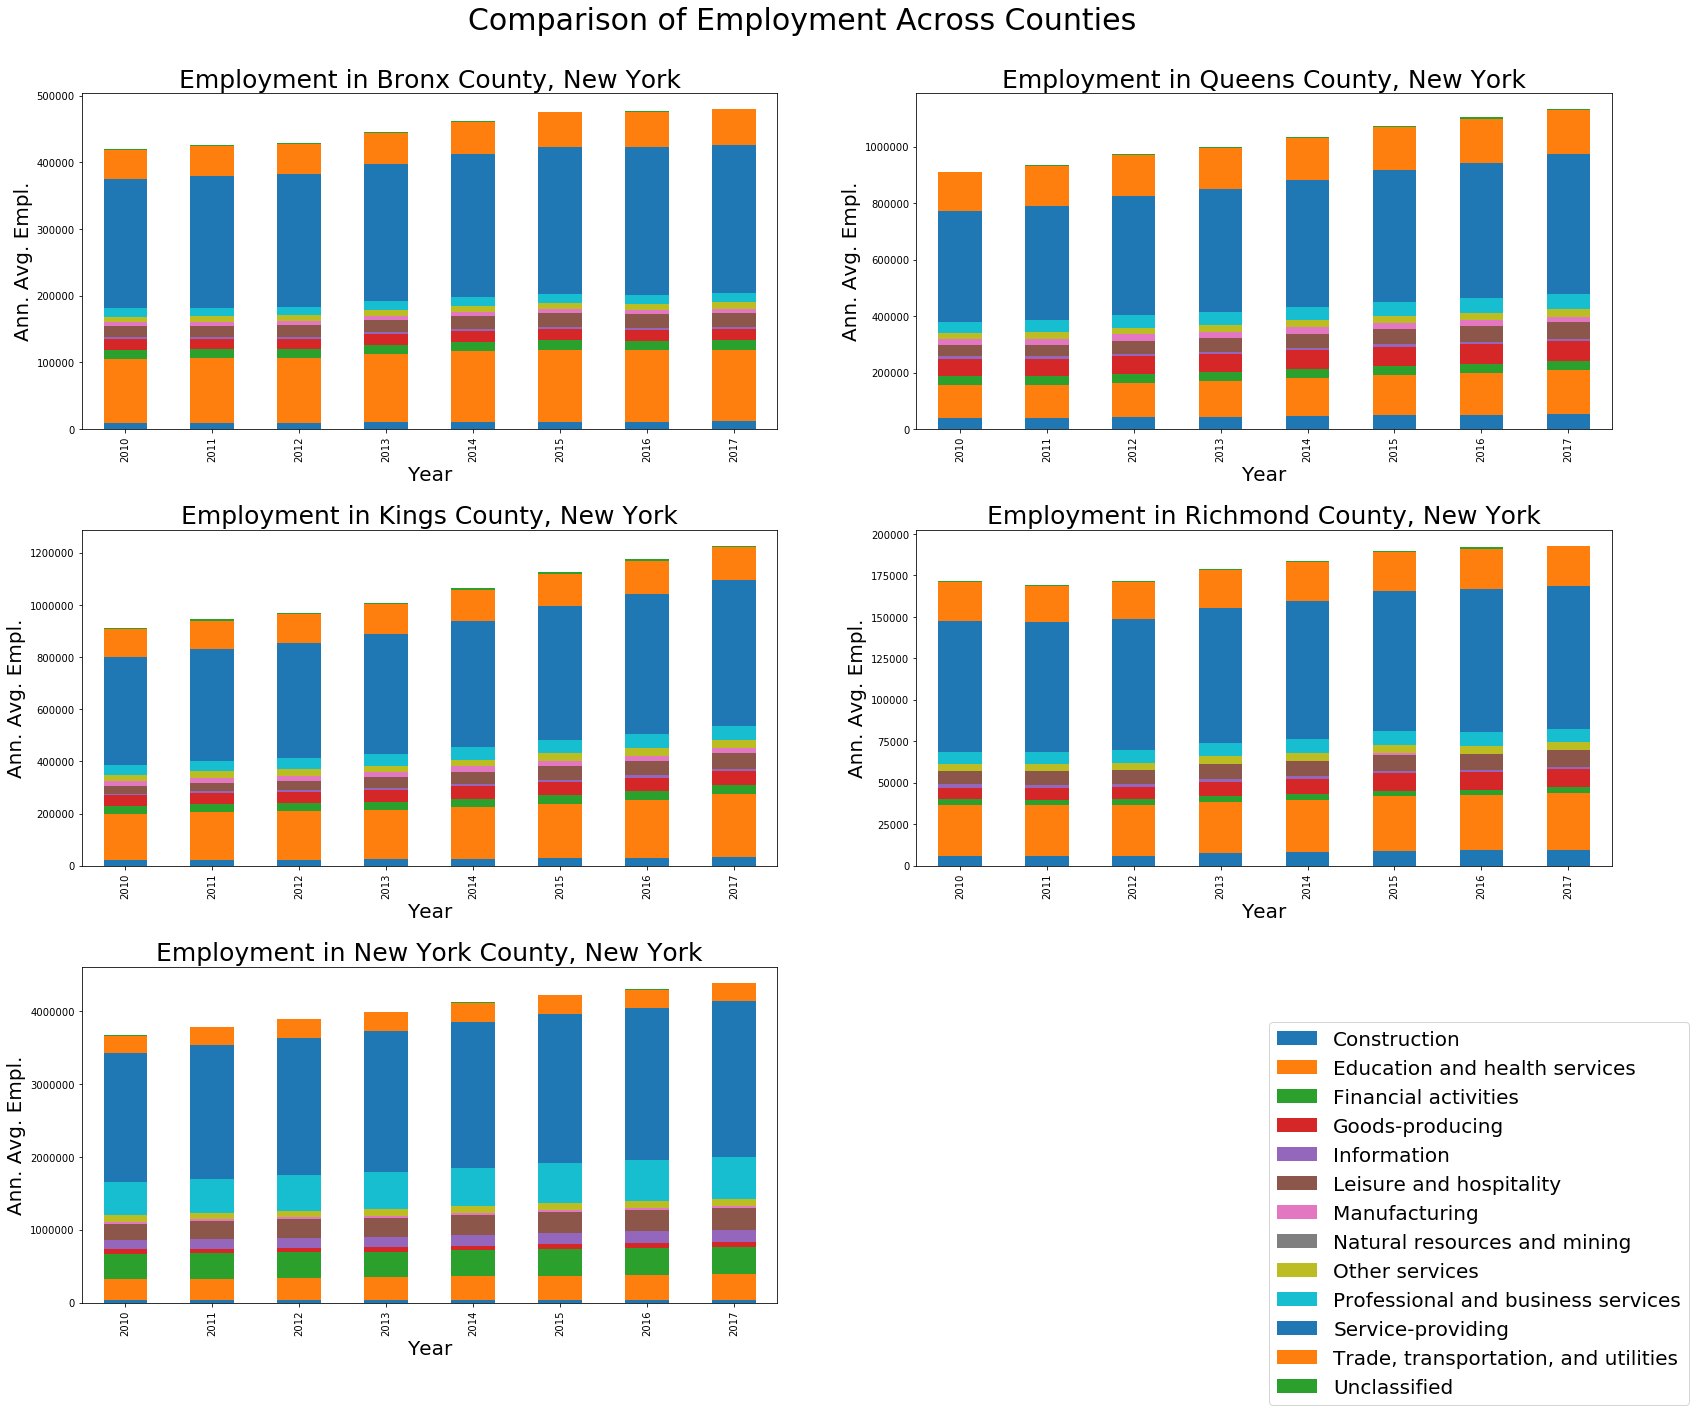

In [39]:
# To control font sizes
titles = 25
x_labels = 20
y_labels = 20
x_ticks = 20
y_ticks = 20

# Set up the plot
fig, axes = plt.subplots(3, 2, figsize=(25,20))
fig.suptitle("Comparison of Employment Across Counties", fontsize=30)

# Counties
cntys = list(counties.Cnty.unique())

# Plot
for i in range(len(cntys)):
    data = counties[counties.Cnty==cntys[i]][['Year','Industry','Annual Average Employment']]
    data = data[data['Industry']!='Total, all industries']
    data = data.pivot(index='Year', columns='Industry', values='Annual Average Employment')
    if i <= 2:
        data.plot.bar(stacked=True, ax=axes[i, 0])
        axes[i, 0].set_title("Employment in {}".format(counties['Area'].unique()[i]), \
                                  fontdict={'fontsize':titles})
        axes[i, 0].set_xlabel("Year", fontdict={'fontsize':x_labels})
        axes[i, 0].set_ylabel("Ann. Avg. Empl.", fontdict={'fontsize':y_labels})
        axes[i, 0].get_legend().remove()

    else:
        data.plot.bar(stacked=True, ax=axes[i-3, 1])
        axes[i-3, 1].set_title("Employment in {}".format(counties['Area'].unique()[i]), \
                                  fontdict={'fontsize':titles})            
        axes[i-3, 1].set_xlabel("Year", fontdict={'fontsize':x_labels})
        axes[i-3, 1].set_ylabel("Ann. Avg. Empl.", fontdict={'fontsize':y_labels})
        axes[i-3, 1].get_legend().remove()

# Add legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', fontsize=20)

# Add padding
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.2)

# Remove unnecessary subplot
axes[2, 1].remove()

# To dos:

* Figure out what to do with 2018 data - data is only availalbe for the first 3 quarters of 2018